# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Elmo embeddings


### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 jinstall upyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 ninstall umpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`
- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow=1.15`
    - Also install `pip3 install tensorflow-hub`
- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df[2000:2020]

,id,text,emotion,intensity
2000,21143,@Melanie_Pierce @HunterHayes awe ain't he a sw...,fear,0.083
2001,21144,@FraserKeegan just had a steak pie supper,fear,0.083
2002,21145,@annalisewrobel_ awe thank you so much love 💕,fear,0.062
2003,21146,Omg he kissed her🙈 #w,fear,0.062
2004,30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
2005,30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2006,30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
2007,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
2008,30004,I feel so blessed to work with the family that...,joy,0.938
2009,30005,"Today I reached 1000 subscribers on YT!! , #go...",joy,0.926


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
test_df

,id,text,emotion,intensity
212,30841,I turn 25 in two weeks. I am so happy. 24 was ...,joy,0.708
57,10914,@SSheil coincidentally watched Ulzana's Raid l...,anger,0.542
225,30854,So far ours greet have raised £250 for @HGatCh...,joy,0.625
260,30889,How can l rule my mind !!!!!! \nIt's hilarious...,joy,0.396
258,30887,[Moment of levity on the B41] Baby: I want ISI...,joy,0.521
...,...,...,...,...
91,21154,Are you worrying/worried?\n1Peter 5:7\nThrow a...,fear,0.438
268,30897,It feels good to get outside for a minute and ...,joy,0.580
129,21192,And I cried in front of my guy last night. And...,fear,0.680
298,40811,SOBRIETY® trying to make being sober fashion...,sadness,0.333


In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

long_text = ' '.join(train_df.text.tolist())

#re.sub(pattern,被replace成,string,數量count,flags)
long_text = re.sub(r'[^a-zA-Z]', " ", long_text) #過濾掉除了字母以外的東西 # ^ 表示 not

fdist1 = FreqDist(word_tokenize(long_text))

plt.figure(figsize=(20,10)) 

fdist1.plot(30)

<Figure size 2000x1000 with 1 Axes>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer() #可產生token
analyze("".join(list(test_df[0:1].text)))

['turn',
 '25',
 'in',
 'two',
 'weeks',
 'am',
 'so',
 'happy',
 '24',
 'was',
 'my',
 'darkest',
 'year',
 'yet',
 'am',
 'elated',
 'that',
 'survived']

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

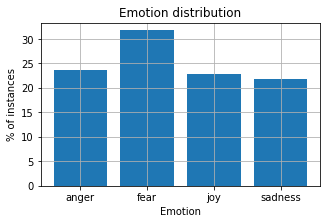

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words) #500 features
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
# tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(train_df.text)
print(vectorizer.get_feature_names()[100:110])

['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody', 'blues', 'body', 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'joy', 'joy', 'sadness', 'fear', 'sadness', 'joy',
       'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
# accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

#數字2 表示顯示到小數點以下兩位
print('training accuracy: {}'.format(round(acc_train, 2))) 

print('testing accuracy: {}'.format(round(acc_test, 3)))


training accuracy: 0.99
testing accuracy: 0.637


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

   micro avg       0.64      0.64      0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

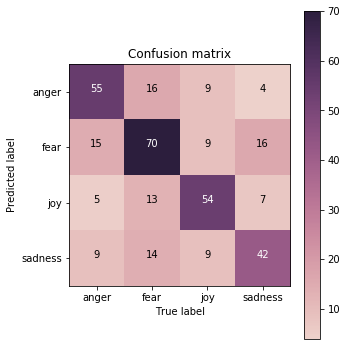

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [32]:
# Answer here
'''
The result means that the accuracy of predicted label and true label. 

Number 55 means that the amount of predicted "anger" and true label is "anger".

Accroding to the confusion matrix, we can know that accuracy of this dataset is very well.
'''

'\nThe result means that the accuracy of predicted label and true label. \n\nNumber 55 means that the amount of predicted "anger" and true label is "anger".\n\nAccroding to the confusion matrix, we can know that accuracy of this dataset is very well.\n'

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

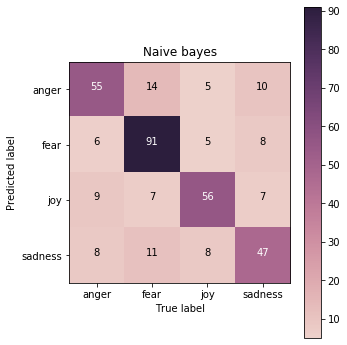

In [33]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

m = MultinomialNB()
y_pred1 = m.fit(X_train,y_train)

y_test1 = y_pred1.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_test1) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Naive bayes')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [34]:
# Answer here
'''
Naive Bayes model versus the Decision Tree
The Decision Tree has a hard time with correlated attributes, 
and Decision tree is a discriminative model, whereas Naive bayes is a generative model.
Moreover, Decision trees are more flexible and easier than Naive bayes model.
'''

'\nNaive Bayes model versus the Decision Tree\nThe Decision Tree has a hard time with correlated attributes, \nand Decision tree is a discriminative model, whereas Naive bayes is a generative model.\nMoreover, Decision trees are more flexible and easier than Naive bayes model.\n'

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [35]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [36]:
## deal with label (string -> one-hot)
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2234        joy
2785        joy
3081    sadness
1082       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [37]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

### 6.4 Train

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 11s 3ms/step - loss: 1.3310 - accuracy: 0.3665 - val_loss: 1.2884 - val_accuracy: 0.4092
Epoch 2/25
3613/3613 [==============================] - 0s 58us/step - loss: 0.9985 - accuracy: 0.6313 - val_loss: 0.9202 - val_accuracy: 0.6715
Epoch 3/25
3613/3613 [==============================] - 0s 59us/step - loss: 0.5857 - accuracy: 0.7905 - val_loss: 0.7539 - val_accuracy: 0.7349
Epoch 4/25
3613/3613 [==============================] - 0s 59us/step - loss: 0.4097 - accuracy: 0.8514 - val_loss: 0.7585 - val_accuracy: 0.7233
Epoch 5/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.3189 - accuracy: 0.8849 - val_loss: 0.7765 - val_accuracy: 0.7205
Epoch 6/25
3613/3613 [==============================] - 0s 63us/step - loss: 0.2561 - accuracy: 0.9112 - val_loss: 0.8378 - val_accuracy: 0.6859
Epoch 7/25
3613/3613 [==============================] - 0s 60us/step - loss: 0.212

### 6.5 Predict on testing data

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[6.4445850e-13, 6.0764845e-11, 1.0000000e+00, 3.6953460e-10],
       [5.3669424e-03, 9.6386492e-01, 4.9609668e-04, 3.0271986e-02],
       [3.4606440e-08, 6.9503600e-05, 9.9992561e-01, 4.8912220e-06],
       [8.9931060e-03, 5.8858182e-05, 9.9085873e-01, 8.9260364e-05],
       [6.0948718e-04, 1.0217404e-06, 9.9911112e-01, 2.7832386e-04]],
      dtype=float32)

In [42]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'joy', 'joy', 'joy'], dtype=object)

In [43]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [44]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366454,1.330976,0.409222,1.288359
1,1,0.631331,0.998498,0.671470,0.920155
2,2,0.790479,0.585709,0.734870,0.753879
3,3,0.851370,0.409723,0.723343,0.758550
4,4,0.884860,0.318879,0.720461,0.776535
5,5,0.911154,0.256128,0.685879,0.837796
6,6,0.928591,0.212352,0.694524,0.868836
7,7,0.948519,0.174284,0.697406,0.939234
8,8,0.952394,0.156792,0.703170,1.007368
9,9,0.960974,0.134712,0.668588,1.088781


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

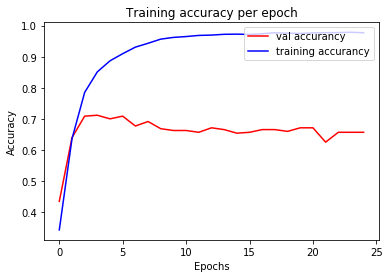

In [173]:
# Answer here
plt.plot(training_log['epoch'],training_log['val_accuracy'],color='r') #直接用training_log
plt.plot(training_log['epoch'],training_log['accuracy'],color='b')

plt.legend(['val accurancy', 'training accurancy'], loc='upper right') #右上角的label
plt.title('Training accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

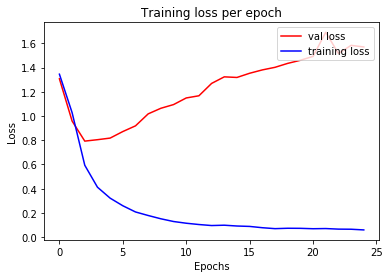

In [174]:
plt.plot(training_log['epoch'],training_log['val_loss'],color='r')
plt.plot(training_log['epoch'],training_log['loss'],color='b')

plt.legend(['val loss', 'training loss'], loc='upper right')
plt.title('Training loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [175]:
'''
In the first picture, after numer 2 epoch is overfitting, training accurancy is high but validation accurancy is low.
On the oppsite, before number 2 epoch is underfitting.
In the second picture, after the point of y-axis 0.8 is overfitting, training loss is low but validation loss is high.
'''

'\nIn the first picture, after numer 2 epoch is overfitting, training accurancy is high but validation accurancy is low.\nOn the oppsite, before number 2 epoch is underfitting.\nIn the second picture, after the point of y-axis 0.8 is overfitting, training loss is low but validation loss is high.\n'

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [176]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')


## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
110,10110,@jennylhowe I am angry at the student for bein...,"[@, jennylhowe, I, am, angry, at, the, student..."
3253,40426,@mik61scot @longshankseddie @ROSAZAMBONINI @Yo...,"[@, mik61scot, @, longshankseddie, @, ROSAZAMB..."
1990,21133,Jeans with fake pockets,"[Jeans, with, fake, pockets]"
1862,21005,My view of the human being is as a dynamic exp...,"[My, view, of, the, human, being, is, as, a, d..."
608,10608,@RiotzXVl papercuts sting and stub ur toe last...,"[@, RiotzXVl, papercuts, sting, and, stub, ur,..."


In [177]:
# see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logging

<module 'logging' from '/usr/lib/python3.6/logging/__init__.py'>

In [178]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'jennylhowe', 'I', 'am', 'angry', 'at', 'the', 'student', 'for', 'being', 'a', 'racist', ',', 'and', 'the', 'teacher', 'for', 'not', 'stopping', 'it', ',', 'and', 'at', 'the', 'class', 'for', 'letting', 'it', 'go', 'by', '.']),
       list(['@', 'mik61scot', '@', 'longshankseddie', '@', 'ROSAZAMBONINI', '@', 'YouTube', 'I', 'thought', 'it', 'was', 'because', 'she', 'once', 'sunk', 'her', 'teeth', 'into', 'something', 'that', "'s", 'meant', '2b', 'sooked']),
       list(['Jeans', 'with', 'fake', 'pockets'])], dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [179]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
110,10110,@jennylhowe I am angry at the student for bein...,"[@, jennylhowe, I, am, angry, at, the, student..."
3253,40426,@mik61scot @longshankseddie @ROSAZAMBONINI @Yo...,"[@, mik61scot, @, longshankseddie, @, ROSAZAMB..."
1990,21133,Jeans with fake pockets,"[Jeans, with, fake, pockets]"
1862,21005,My view of the human being is as a dynamic exp...,"[My, view, of, the, human, being, is, as, a, d..."
608,10608,@RiotzXVl papercuts sting and stub ur toe last...,"[@, RiotzXVl, papercuts, sting, and, stub, ur,..."


In [197]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

I1122 13:33:48.354135 139894830405440 word2vec.py:1588] collecting all words and their counts
I1122 13:33:48.355795 139894830405440 word2vec.py:1573] PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
I1122 13:33:48.369249 139894830405440 word2vec.py:1596] collected 11963 word types from a corpus of 72342 raw words and 3613 sentences
I1122 13:33:48.369747 139894830405440 word2vec.py:1647] Loading a fresh vocabulary
I1122 13:33:48.384631 139894830405440 word2vec.py:1671] effective_min_count=1 retains 11963 unique words (100% of original 11963, drops 0)
I1122 13:33:48.385214 139894830405440 word2vec.py:1677] effective_min_count=1 leaves 72342 word corpus (100% of original 72342, drops 0)
I1122 13:33:48.411236 139894830405440 word2vec.py:1736] deleting the raw counts dictionary of 11963 items
I1122 13:33:48.411999 139894830405440 word2vec.py:1739] sample=0.001 downsamples 44 most-common words
I1122 13:33:48.412478 139894830405440 word2vec.py:1742] downsampling leaves estima

I1122 13:33:50.748663 139894830405440 base_any2vec.py:349] worker thread finished; awaiting finish of 1 more threads
I1122 13:33:50.751404 139894830405440 base_any2vec.py:349] worker thread finished; awaiting finish of 0 more threads
I1122 13:33:50.751831 139894830405440 base_any2vec.py:1346] EPOCH - 14 : training on 72342 raw words (55065 effective words) took 0.0s, 1529837 effective words/s
I1122 13:33:50.788211 139894830405440 base_any2vec.py:349] worker thread finished; awaiting finish of 2 more threads
I1122 13:33:50.789058 139894830405440 base_any2vec.py:349] worker thread finished; awaiting finish of 1 more threads
I1122 13:33:50.791148 139894830405440 base_any2vec.py:349] worker thread finished; awaiting finish of 0 more threads
I1122 13:33:50.791592 139894830405440 base_any2vec.py:1346] EPOCH - 15 : training on 72342 raw words (54955 effective words) took 0.0s, 1537086 effective words/s
I1122 13:33:50.827562 139894830405440 base_any2vec.py:349] worker thread finished; awaiting

### 7.3 Generating word vector (embeddings)

In [198]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.66772205, -0.16207041,  0.5401397 ,  0.20790407, -0.5136917 ,
        0.5772015 , -0.6673406 , -0.08257424, -0.0583546 ,  0.5505089 ,
       -0.07377131, -0.20022826,  0.38432205, -0.26304305,  0.64621854,
       -0.77315205, -0.46880087,  0.46389902, -0.30515185,  0.24127941,
       -0.13740839,  0.13781917, -0.7783457 ,  0.85133857,  0.08027158,
        0.5522855 , -0.08860634, -0.24790554,  0.70487076,  0.07722978,
        0.4186685 ,  1.4666038 ,  0.5935832 , -0.27980262, -0.13764752,
       -0.53676015, -0.4393056 ,  0.8937142 ,  0.3555933 , -0.15228413,
       -0.08521585, -0.7885954 ,  0.36933243, -0.19867244,  0.00247492,
       -0.5623035 , -0.0618423 ,  0.48420215, -0.47931826,  1.2105665 ,
       -0.14676866, -0.27636227,  0.0584996 , -0.80939305,  0.02470227,
        0.43084282, -0.1629492 , -0.41252586, -0.34947395,  0.42354932,
       -0.03100602, -0.5646543 ,  0.699546  , -1.1292611 ,  0.38528004,
        0.55580914, -0.6153858 ,  0.0968361 ,  0.3870871 , -0.19

In [199]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

I1122 13:33:51.008687 139894830405440 keyedvectors.py:1353] precomputing L2-norms of word weight vectors


[('Makes', 0.9541457891464233),
 ('keeping', 0.9520285129547119),
 ('cats', 0.9517809152603149),
 ("'you", 0.9510654807090759),
 ('cease', 0.9478545188903809),
 ('adventure', 0.944515585899353),
 ('Be', 0.9410277605056763),
 ('birthday', 0.9397333264350891),
 ('dad', 0.9359960556030273),
 ('See', 0.9350951910018921)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [202]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

w2v_google_model.most_similar('happy', topn=10)

I1122 13:35:07.745631 139894830405440 utils_any2vec.py:341] loading projection weights from GoogleNews/GoogleNews-vectors-negative300.bin.gz
I1122 13:37:28.800133 139894830405440 utils_any2vec.py:405] loaded (3000000, 300) matrix from GoogleNews/GoogleNews-vectors-negative300.bin.gz
I1122 13:37:28.800973 139894830405440 keyedvectors.py:1353] precomputing L2-norms of word weight vectors


load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [193]:
import gensim.downloader as api

## If you see SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")

glove_twitter_25_model.most_similar('happy', topn=10)

I1122 13:17:13.785883 139894830405440 utils_any2vec.py:341] loading projection weights from /home/alissa77/gensim-data/glove-twitter-25/glove-twitter-25.gz
I1122 13:17:41.747004 139894830405440 utils_any2vec.py:405] loaded (1193514, 25) matrix from /home/alissa77/gensim-data/glove-twitter-25/glove-twitter-25.gz
I1122 13:17:41.868861 139894830405440 keyedvectors.py:1353] precomputing L2-norms of word weight vectors


load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [203]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here

we can use the technique of vector composition to calculate the magnitude and the direction of the sum of several forces.


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [205]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [206]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [207]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [208]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [209]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

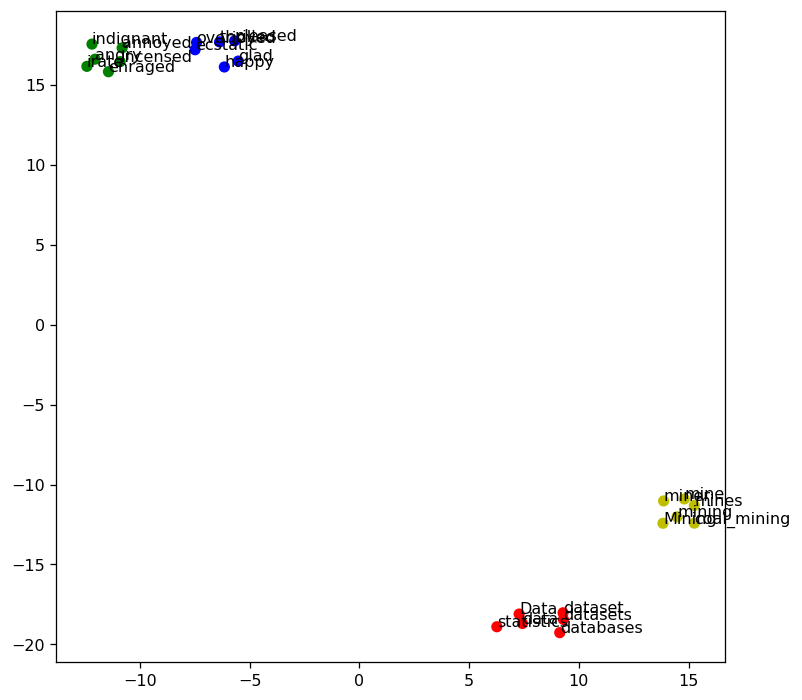

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

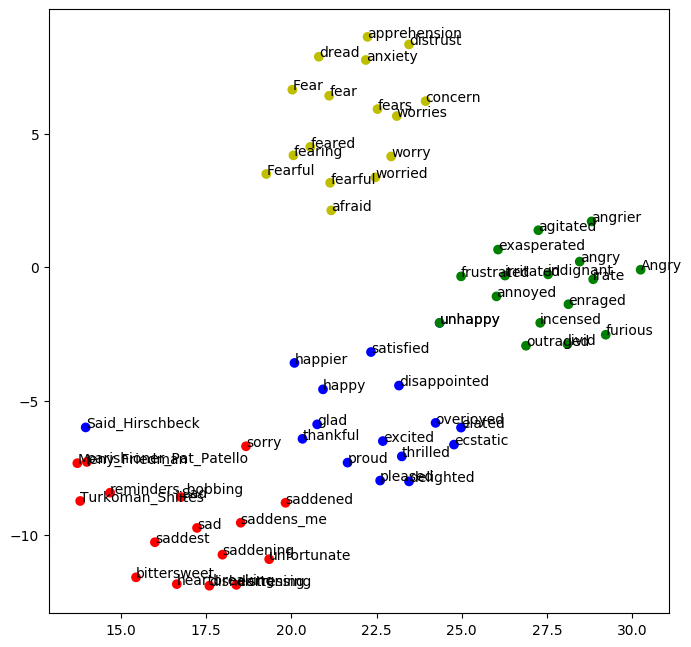

In [228]:
# Answer here
model = w2v_google_model

topn = 15  #15 words
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)] 
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words

cn = topn + 1  # +1表示
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
#b -> happy #g -> angry

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 10. Elmo embeddings

Besides Word2Vec, several other pretrained models for generating embeddings exist. Here, we'll take a look at ElMo embeddings.
Elmo is a language model trained on a task to predict the next word in a sequence of words, but is bidirectional (unlike word2vec).

[Image](pic/pics8.png)

Source: (http://jalammar.github.io/illustrated-bert/)

To embed the sentences, we need to tokenize them and get them into a tensor of uniform shape.This means every sentence should have the same amount of tokens  (ie. If we have 5 sentences, we should have an array of 5 * x ). We will achieve this through padding, or adding "" at the end of each sentence for each missing token up to x.

We'll be using the Keras tokenizer to tokenize and pad. Keras tokenizer will first map each word to a number, and we'll get the tokenizing below in the text_tok_keras column.

In [62]:
from keras.preprocessing.text import Tokenizer

#Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~')
tokenizer_keras.fit_on_texts(train_df['text'])
train_df['text_tok_keras'] = tokenizer_keras.texts_to_sequences(train_df['text'])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426]"
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513]"
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


In [63]:
#check the lenght of the tokenized sentences
list(map(lambda x: len(x), train_df['text_tok_keras'].iloc[:5]))

[16, 9, 14, 4, 24]

As we discudded, the lenght of the tokenized sentences is not the same, so we pad.

In [64]:
from keras.preprocessing.sequence import pad_sequences

#pad sequences
maxlen = 30 # arbitrary
padded_tokens = pad_sequences(train_df['text_tok_keras'],  maxlen=maxlen, padding="post")
train_df['text_tok_keras'] = list(padded_tokens)
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


Now we map back to words to obtain the padded tokenized representations in the text_tok_keras_words column.

In [65]:
#map back to words
reverse_word_map = dict(map(reversed, tokenizer_keras.word_index.items()))
train_df['text_tok_keras_words'] = train_df['text_tok_keras'].apply(lambda x_list: [reverse_word_map[x] if x>0 else "" for x in x_list])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras,text_tok_keras_words
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ...","[take, public, opinion, on, revenge, with, pak..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,...","[my, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3...","[panicatthedisco, hey, y'all, announced, it, l..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,...","[christy_rtr, doge_e_fresh, i'm, despondent, ,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ...","[sarah_urbina, why, do, you, even, beef, sara,..."


Now, we use the Tensorflow Hub to charge a pretrained Elmo model. TensorFlow Hub is a library for reusable machine learning models. You can learn more here:
Source: (https://www.tensorflow.org/hub)
Make sure tensor has appropriate size!


In [66]:
import tensorflow as tf
import tensorflow_hub as hub

#load elmo
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable = True)

#generic way to generate an array of the same length
token_len = np.empty(len(train_df))
token_len.fill(maxlen)

#create embeddings
embeddings = elmo(inputs={"tokens": list(train_df['text_tok_keras_words']),
                          "sequence_len": token_len},
                  signature="tokens",
                  as_dict=True)["elmo"]


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [67]:
#check the Embedding layer dimension
embeddings.shape

TensorShape([Dimension(3613), Dimension(30), Dimension(1024)])

To embed a word, you need to pass the position of the token. Let's take the first sentence:

In [10]:
train_df['text'].iloc[0]

'@SusannahSpot I could pop round '

In [ ]:
# this might take a long time, make sure you can run Tf on your computer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("SusannahSpot")
print(sess.run(embeddings[0][1]))

print("I")
print(sess.run(embeddings[0][1]))

print("could")
print(sess.run(embeddings[0][2]))

print("pop")
print(sess.run(embeddings[0][3]))

print("round")
print(sess.run(embeddings[0][4]))

---